The goal of this update is to calculate variogram and determine the direction of any spatial continuity within the dataset. Properties calculated includes facies, porosity and permeability. 

# 1. Import packages and load dataset



In [1]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python      
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import random
import math

In [2]:
df = pd.read_csv('8_sample_data.csv')     # load our data table

Plotting parameters

In [3]:
pormin = 0.05; pormax = 0.25
permmin = 0.01; permmax = 1000;                # user specified min and max
AImin = 1000.0; AImax = 6000
Fmin = 0; Fmax = 1

xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
pormin = 0.05; pormax = 0.25
permmin = 0.01; permmax = 300;                # user specified min and max
AImin = 1000.0; AImax = 6000
Fmin = 0; Fmax = 1
cmap = plt.cm.plasma                    # color map

In [4]:
print("declustering porosity:")
wts_porosity, cell_sizes, dmeans = geostats.declus(df,'X','Y','Porosity',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df['Wts_porosity'] = wts_porosity # add weights to the sample data DataFrame
print("\ndeclustering permeability:")
wts_perm, cell_sizes, dmeans = geostats.declus(df,'X','Y','Perm',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df['Wts_perm'] = wts_perm# add weights to the sample data DataFrame
print("\ndeclustering AI:")
wts_AI, cell_sizes, dmeans = geostats.declus(df,'X','Y','AI',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df['Wts_AI'] = wts_AI                        # add weights to the sample data DataFrame

df.describe()                                  # preview to check the sample data DataFrame

df['Perm_declus']=(df['Perm'].values)*(df['Wts_perm'].values)
df['Porosity_declus']=(df['Porosity'].values)*(df['Wts_porosity'].values)

declustering porosity:
There are 168 data with:
   mean of      0.15391629523632155 
   min and max  0.0808837694350806 and 0.2494536799448483
   standard dev 0.033906041125275496 

declustering permeability:
There are 168 data with:
   mean of      77.40357185885863 
   min and max  0.046707210006564456 and 2056.7291327432786
   standard dev 202.3448434205727 

declustering AI:
There are 168 data with:
   mean of      3396.279944373145 
   min and max  1189.8579070757687 and 5186.2913136919315
   standard dev 746.759421225971 


In [5]:
df_sand = pd.DataFrame.copy(df[df['Facies'] == 1]).reset_index()  # copy only 'Facies' = sand records
df_shale = pd.DataFrame.copy(df[df['Facies'] == 0]).reset_index() # copy only 'Facies' = shale records

In [6]:
geostats.nscore

<function geostatspy.geostats.nscore(df, vcol, wcol=None, ismooth=False, dfsmooth=None, smcol=0, smwcol=0)>

In [7]:
#Transform to Gaussian by Facies
df['NPor'], tvPor, tnsPor = geostats.nscore(df, 'Porosity_declus') # nscore transform for all facies porosity 
df_sand['NPor'], tvPorSand, tnsPorSand = geostats.nscore(df_sand, 'Porosity_declus')  # nscore transform for sand facies porosity 
df_shale['NPor'], tvPorShale, tnsPorShale = geostats.nscore(df_shale, 'Porosity_declus')  # nscore transform for shale facies porosity
df['NPerm'], tvPermSand, tnsPermSand = geostats.nscore(df, 'Perm_declus')  # nscore transform for all facies permeability
df_sand['NPerm'], tvPermSand, tnsPermSand = geostats.nscore(df_sand, 'Perm_declus')  # nscore transform for sand facies permeability
df_shale['NPerm'], tvPermShale, tnsPermShale = geostats.nscore(df_shale, 'Perm_declus')  # nscore transform for shale facies permeability

In [8]:
df.describe()

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI,Wts_porosity,Wts_perm,Wts_AI,Perm_declus,Porosity_declus,NPor,NPerm
count,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,1.680000e+02,1.680000e+02
mean,207.767857,514.345238,465.87500,0.666667,0.153916,77.403572,3396.279944,1.000000,1.000000,1.000000,62.868121,0.148536,8.039624e-04,2.139409e-03
std,114.277788,290.006483,286.99991,0.472814,0.034007,202.949762,748.991891,0.647128,0.609475,0.049482,166.560660,0.088469,9.972123e-01,9.936122e-01
min,3.000000,0.000000,20.00000,0.000000,0.080884,0.046707,1189.857907,0.440571,0.506728,0.553293,0.069407,0.057774,-2.634059e+00,-2.390972e+00
25%,104.000000,260.000000,209.00000,0.000000,0.130374,2.889615,2923.281779,0.653528,0.635996,1.005988,2.579100,0.099211,-6.651534e-01,-6.698364e-01
50%,216.500000,490.000000,439.50000,1.000000,0.150119,12.088688,3456.145034,0.830125,0.771369,1.005988,10.637943,0.123226,-1.776357e-15,-1.776357e-15
75%,306.750000,780.000000,729.00000,1.000000,0.177243,65.522793,3957.836990,1.127196,1.110217,1.005988,58.030568,0.165906,6.698364e-01,6.698364e-01
max,381.000000,990.000000,979.00000,1.000000,0.249454,2056.729133,5186.291314,6.718435,4.120423,1.005988,1637.906742,0.916554,2.750393e+00,2.750393e+00


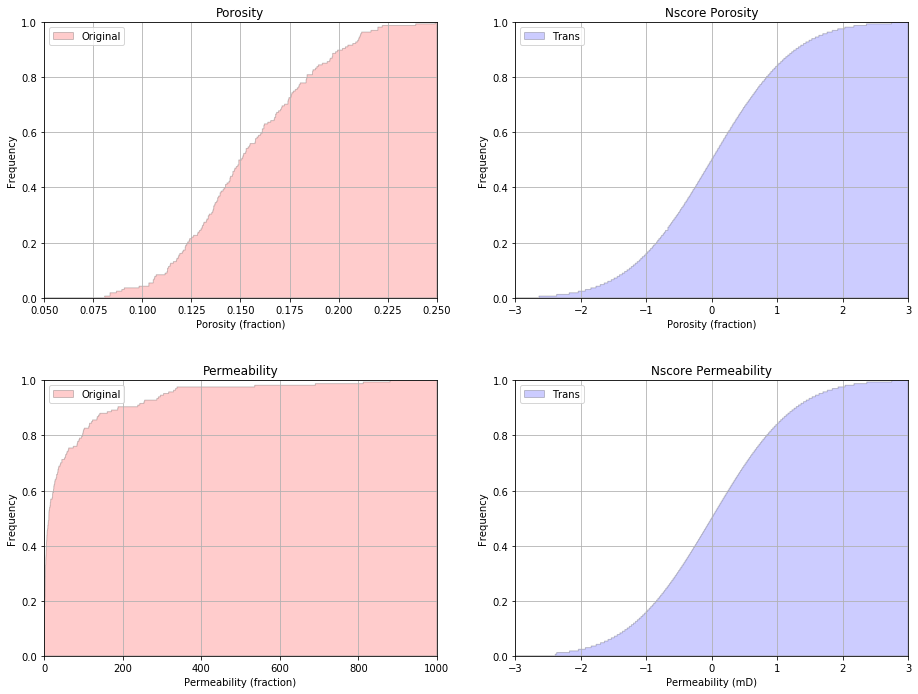

In [9]:
plt.subplot(221)                                        # plot original sand and shale porosity histograms
plt.hist(df['Porosity'], facecolor='red',bins=np.linspace(0.0,0.25,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([0.05,0.25]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(222)  
plt.hist(df['NPor'], facecolor='blue',bins=np.linspace(-3.0,3.0,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label = 'Trans')
plt.xlim([-3.0,3.0]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Nscore Porosity')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(223)                                        # plot nscore transformed sand and shale histograms
plt.hist(df['Perm'], facecolor='red',bins=np.linspace(0.0,1000.0,100000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([0.0,1000.0]); plt.ylim([0,1.0])
plt.xlabel('Permeability (fraction)'); plt.ylabel('Frequency'); plt.title('Permeability')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(224)                                        # plot nscore transformed sand and shale histograms
plt.hist(df['NPerm'], facecolor='blue',bins=np.linspace(-3.0,3.0,100000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label = 'Trans')
plt.xlim([-3.0,3.0]); plt.ylim([0,1.0])
plt.xlabel('Permeability (mD)'); plt.ylabel('Frequency'); plt.title('Nscore Permeability')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3)
plt.show()

# 2 . Variogram map for porosity to determine primary directions and possible ranges

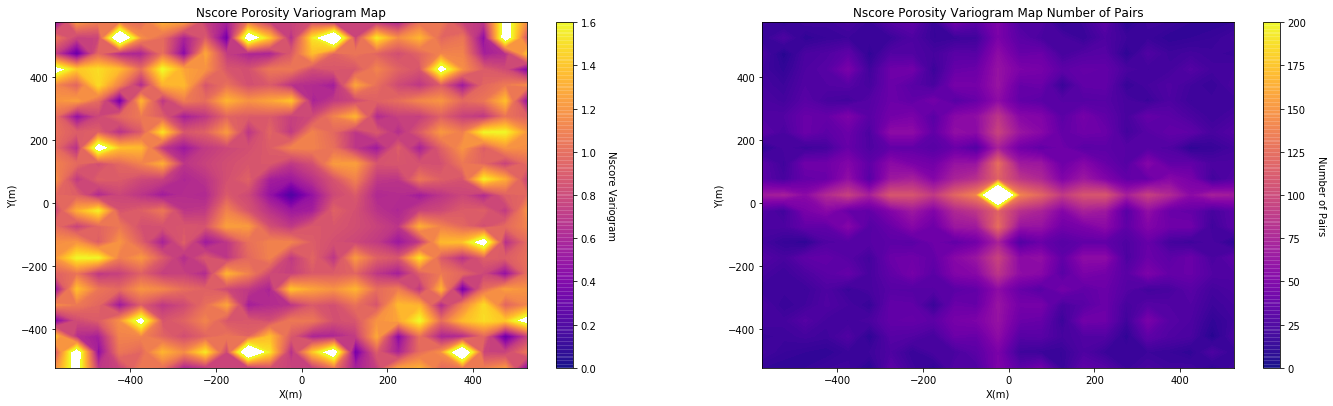

The shape of the output is (23, 23)


In [10]:
vmap, npmap = geostats.varmapv(df,'X','Y','NPor',tmin=-999,tmax=999,nxlag=11,nylag=11,dxlag=50,dylag=50,minnp=1,isill=1)

plt.subplot(121)
GSLIB.pixelplt_st(vmap,-575,575,-575,575,50.0,0,1.6,'Nscore Porosity Variogram Map','X(m)','Y(m)','Nscore Variogram',cmap)

plt.subplot(122)
GSLIB.pixelplt_st(npmap,-575,575,-575,575,50.0,0,200,'Nscore Porosity Variogram Map Number of Pairs','X(m)','Y(m)','Number of Pairs',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

print('The shape of the output is ' + str(vmap.shape))

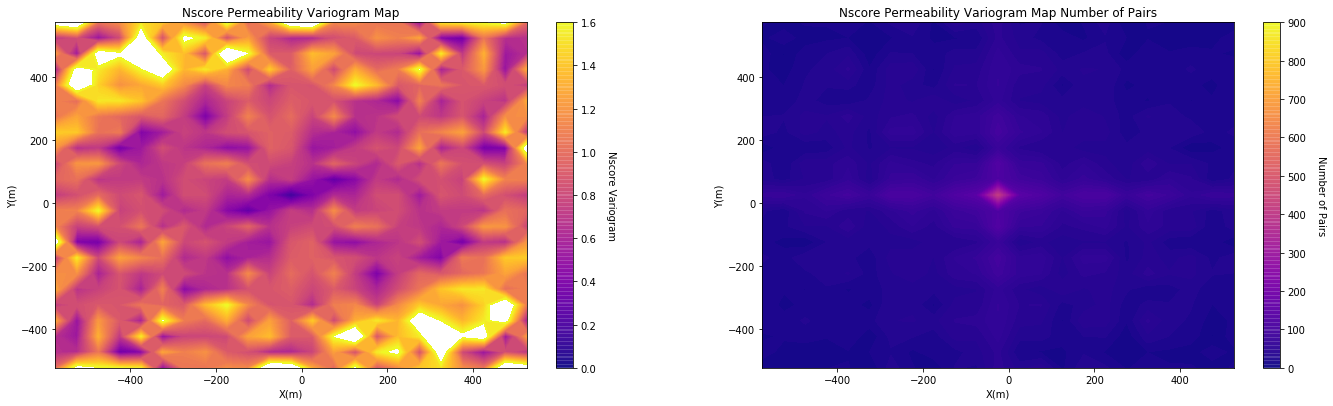

The shape of the output is (23, 23)


In [11]:
vmap, npmap = geostats.varmapv(df,'X','Y','NPerm',tmin=-999,tmax=999,nxlag=11,nylag=11,dxlag=50,dylag=50,minnp=1,isill=1)

plt.subplot(121)
GSLIB.pixelplt_st(vmap,-575,575,-575,575,50.0,0,1.6,'Nscore Permeability Variogram Map','X(m)','Y(m)','Nscore Variogram',cmap)

plt.subplot(122)
GSLIB.pixelplt_st(npmap,-575,575,-575,575,50.0,0,900,'Nscore Permeability Variogram Map Number of Pairs','X(m)','Y(m)','Number of Pairs',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

print('The shape of the output is ' + str(vmap.shape))

# 3. Variogram calculation

### Facies

In [12]:
df.describe()

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI,Wts_porosity,Wts_perm,Wts_AI,Perm_declus,Porosity_declus,NPor,NPerm
count,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,1.680000e+02,1.680000e+02
mean,207.767857,514.345238,465.87500,0.666667,0.153916,77.403572,3396.279944,1.000000,1.000000,1.000000,62.868121,0.148536,8.039624e-04,2.139409e-03
std,114.277788,290.006483,286.99991,0.472814,0.034007,202.949762,748.991891,0.647128,0.609475,0.049482,166.560660,0.088469,9.972123e-01,9.936122e-01
min,3.000000,0.000000,20.00000,0.000000,0.080884,0.046707,1189.857907,0.440571,0.506728,0.553293,0.069407,0.057774,-2.634059e+00,-2.390972e+00
25%,104.000000,260.000000,209.00000,0.000000,0.130374,2.889615,2923.281779,0.653528,0.635996,1.005988,2.579100,0.099211,-6.651534e-01,-6.698364e-01
50%,216.500000,490.000000,439.50000,1.000000,0.150119,12.088688,3456.145034,0.830125,0.771369,1.005988,10.637943,0.123226,-1.776357e-15,-1.776357e-15
75%,306.750000,780.000000,729.00000,1.000000,0.177243,65.522793,3957.836990,1.127196,1.110217,1.005988,58.030568,0.165906,6.698364e-01,6.698364e-01
max,381.000000,990.000000,979.00000,1.000000,0.249454,2056.729133,5186.291314,6.718435,4.120423,1.005988,1637.906742,0.916554,2.750393e+00,2.750393e+00


In [13]:
df['Is_sand'] = np.where(df['Facies']==1, 1, 0)
df['Is_shale'] = np.where(df['Facies']==0, 1, 0)

In [14]:
# Calculate Sample Data Isotropic Variograms
tmin = -9999.; tmax = 9999.; 
lag_dist = 100.0; lag_tol = 100.0; nlag = 7; bandh = 9999.9; azi = 0; atol = 90.0; isill = 1

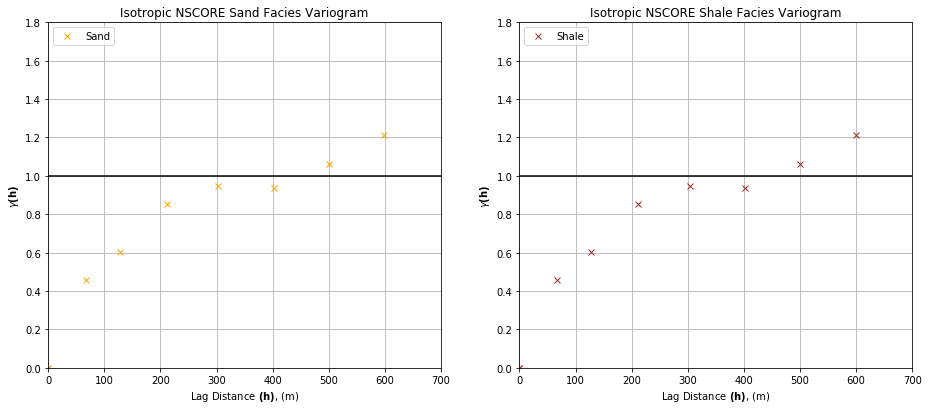

In [15]:
lag_sand, sand_gamma, sand_npair = geostats.gamv(df,"X","Y","Is_sand",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)


lag_shale, shale_gamma, shale_npair = geostats.gamv(df,"X","Y","Is_shale",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)


plt.subplot(121)

plt.plot(lag_sand,sand_gamma,'x',color = 'orange',label = 'Sand')

plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Isotropic NSCORE Sand Facies Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(122)
plt.plot(lag_shale,shale_gamma,'x',color = 'brown',label = 'Shale')
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Isotropic NSCORE Shale Facies Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

In [16]:
tmin = -9999.; tmax = 9999.                             # no trimming 
lag_dist = 100.0; lag_tol = 100.0; nlag = 7;            # maximum lag is 700m and tolerance > 1/2 lag distance for smoothing
bandh = 9999.9; atol = 22.5                             # no bandwidth, directional variograms
isill = 1                                               # standardize sill
azi_mat = [0,22.5,45,67.5,90,112.5,135,157.5]           # directions in azimuth to consider

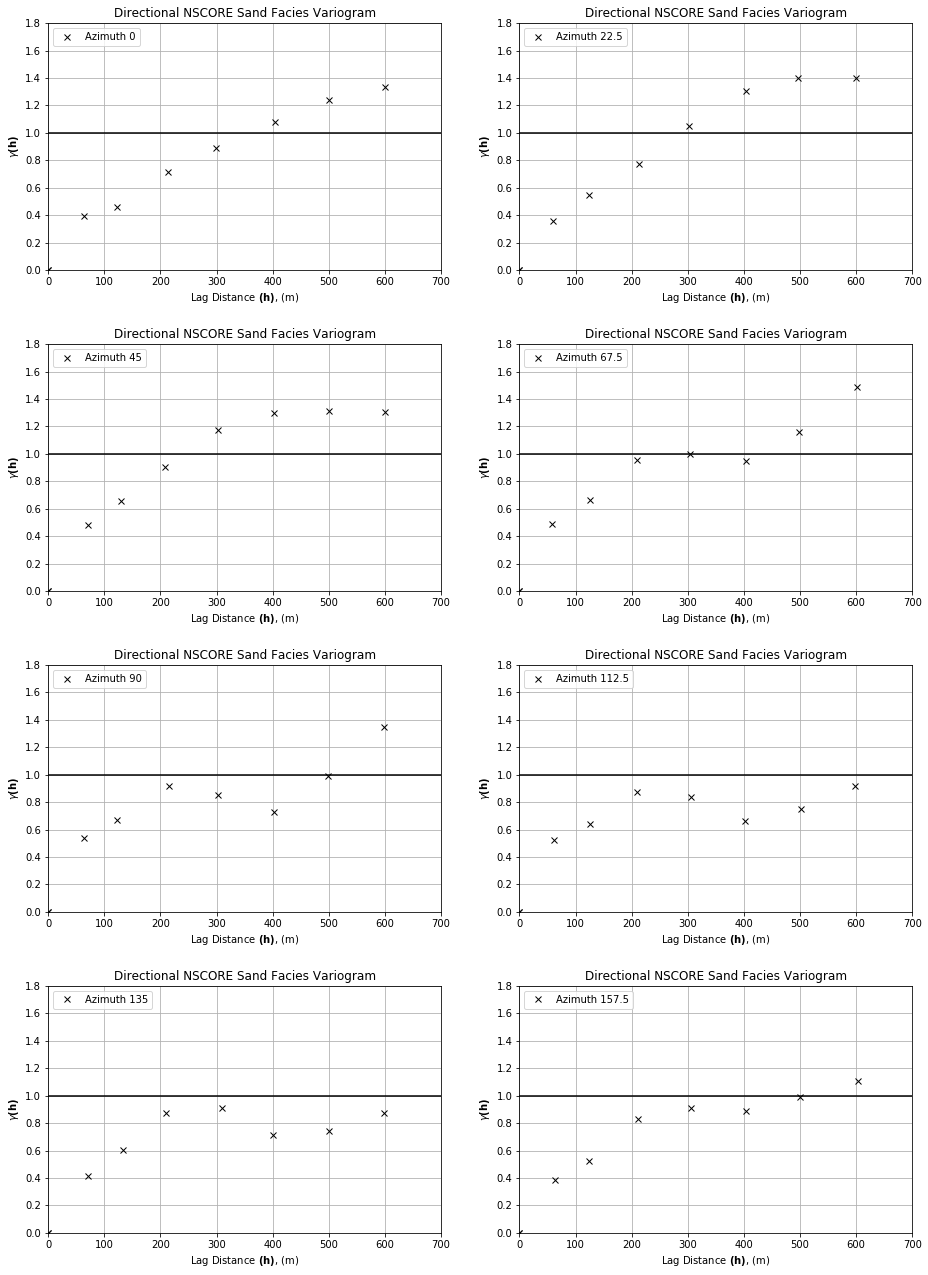

In [17]:
# Arrays to store the results
lag_sand = np.zeros((len(azi_mat),nlag+2)); gamma_sand = np.zeros((len(azi_mat),nlag+2)); npp_sand = np.zeros((len(azi_mat),nlag+2));

for iazi in range(0,len(azi_mat)):                      # Loop over all directions
    lag_sand[iazi,:], gamma_sand[iazi,:], npp_sand[iazi,:] = geostats.gamv(df,"X","Y","Is_sand",tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[iazi],atol,bandh,isill)
    plt.subplot(4,2,iazi+1)
    plt.plot(lag_sand[iazi,:],gamma_sand[iazi,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[iazi]))
    plt.plot([0,2000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Directional NSCORE Sand Facies Variogram')
    plt.xlim([0,700])
    plt.ylim([0,1.8])
    plt.legend(loc='upper left')
    plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.2, wspace=0.2, hspace=0.3)
plt.show()

Facies variogram show major direction at 157.5 degree. With range of 500 m. Minor direction at 67.5 degree with range of 300 m. 

### Porosity and Permeability

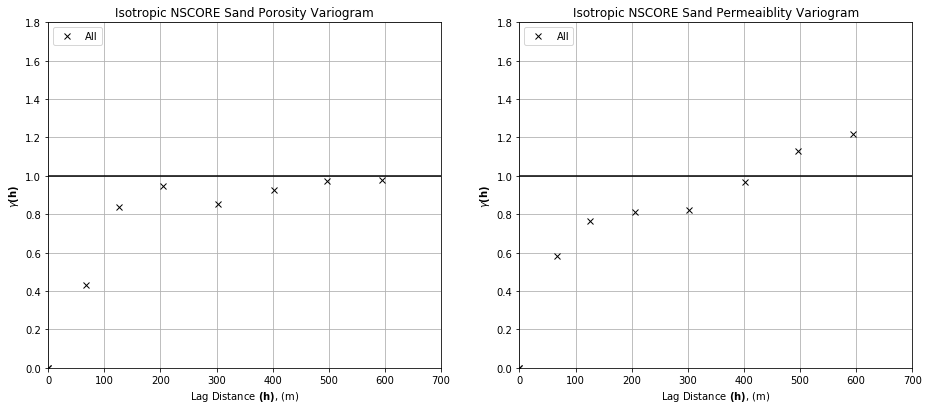

In [18]:
# Calculate Sample Data Isotropic Variograms
tmin = -9999.; tmax = 9999.; 
lag_dist = 100.0; lag_tol = 100.0; nlag = 7; bandh = 9999.9; azi = 0; atol = 90.0; isill = 1


lag, por_gamma, por_npair = geostats.gamv(df_sand,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)

lag, perm_gamma, perm_npair = geostats.gamv(df_sand,"X","Y","NPerm",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)

plt.subplot(121)
plt.plot(lag,por_gamma,'x',color = 'black',label = 'All')
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Isotropic NSCORE Sand Porosity Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(122)
plt.plot(lag,perm_gamma,'x',color = 'black',label = 'All')
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Isotropic NSCORE Sand Permeaiblity Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

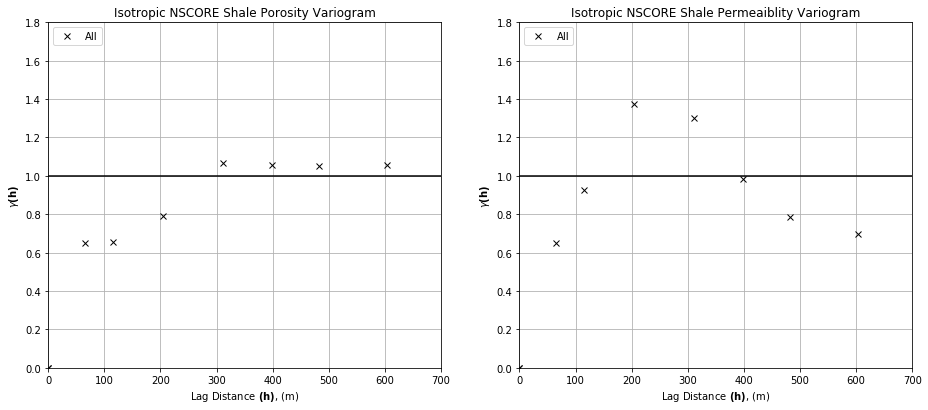

In [20]:
# Calculate Sample Data Isotropic Variograms
tmin = -9999.; tmax = 9999.; 
lag_dist = 100.0; lag_tol = 100.0; nlag = 7; bandh = 9999.9; azi = 0; atol = 90.0; isill = 1


lag, por_gamma, por_npair = geostats.gamv(df_shale,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)

lag, perm_gamma, perm_npair = geostats.gamv(df_shale,"X","Y","NPerm",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)

plt.subplot(121)
plt.plot(lag,por_gamma,'x',color = 'black',label = 'All')
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Isotropic NSCORE Shale Porosity Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(122)
plt.plot(lag,perm_gamma,'x',color = 'black',label = 'All')
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Isotropic NSCORE Shale Permeaiblity Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

In [21]:
tmin = -9999.; tmax = 9999.                             # no trimming 
lag_dist = 100.0; lag_tol = 100.0; nlag = 7;            # maximum lag is 700m and tolerance > 1/2 lag distance for smoothing
bandh = 9999.9; atol = 22.5                             # no bandwidth, directional variograms
isill = 1                                               # standardize sill
azi_mat = [0,22.5,45,67.5,90,112.5,135,157.5]           # directions in azimuth to consider

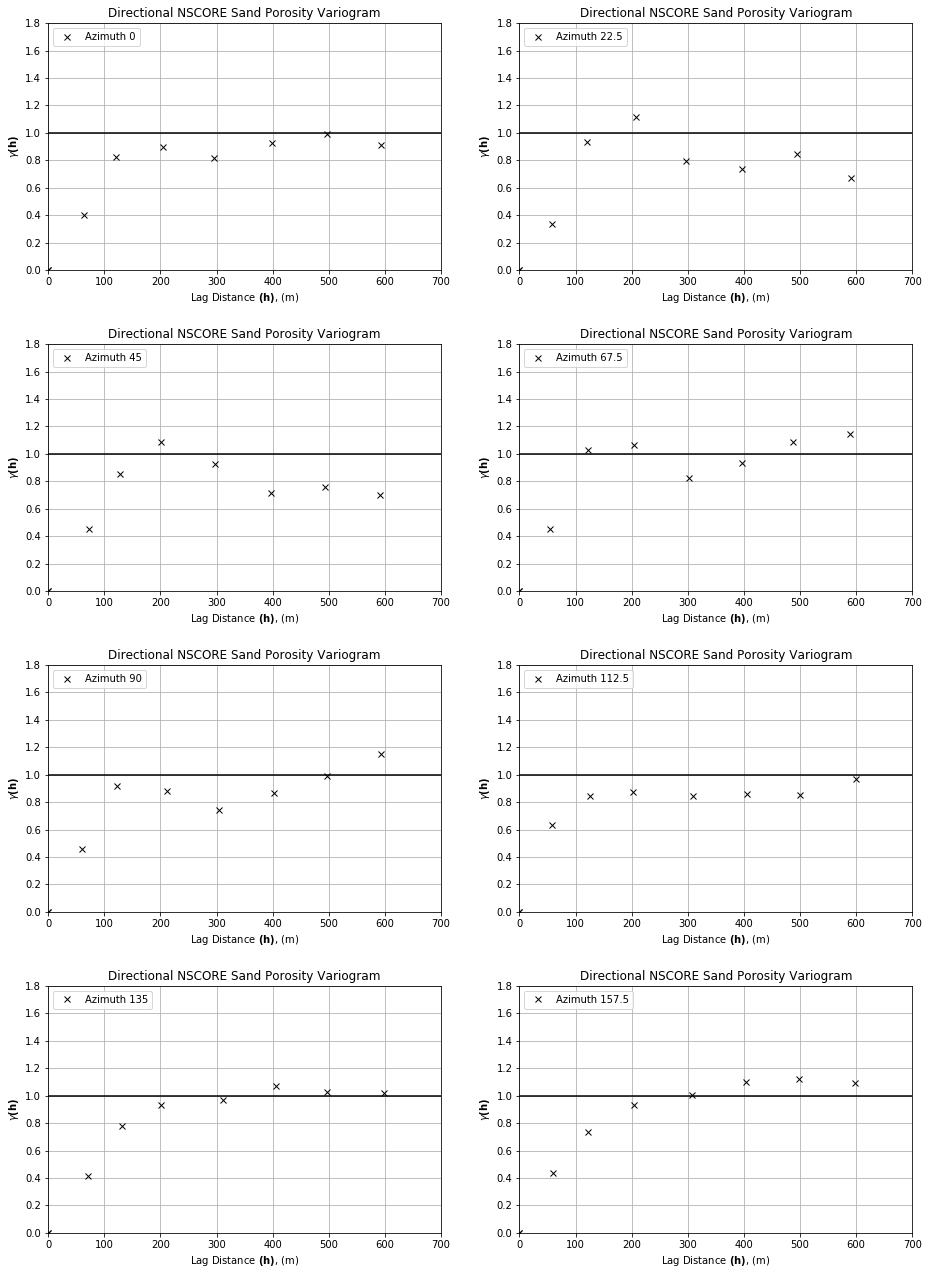

In [22]:
# Arrays to store the results
lag_sand_por = np.zeros((len(azi_mat),nlag+2)); gamma_sand_por = np.zeros((len(azi_mat),nlag+2)); npp_sand_por = np.zeros((len(azi_mat),nlag+2));

for iazi in range(0,len(azi_mat)):                      # Loop over all directions
    lag_sand_por[iazi,:], gamma_sand_por[iazi,:], npp_sand_por[iazi,:] = geostats.gamv(df_sand,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[iazi],atol,bandh,isill)
    plt.subplot(4,2,iazi+1)
    plt.plot(lag_sand_por[iazi,:],gamma_sand_por[iazi,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[iazi]))
    plt.plot([0,2000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Directional NSCORE Sand Porosity Variogram')
    plt.xlim([0,700])
    plt.ylim([0,1.8])
    plt.legend(loc='upper left')
    plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.2, wspace=0.2, hspace=0.3)
plt.show()

Sand porosity variogram show major direction at 112.5 degree with range of 600 m. Minor direction at 22.5 with range of 150 m. 

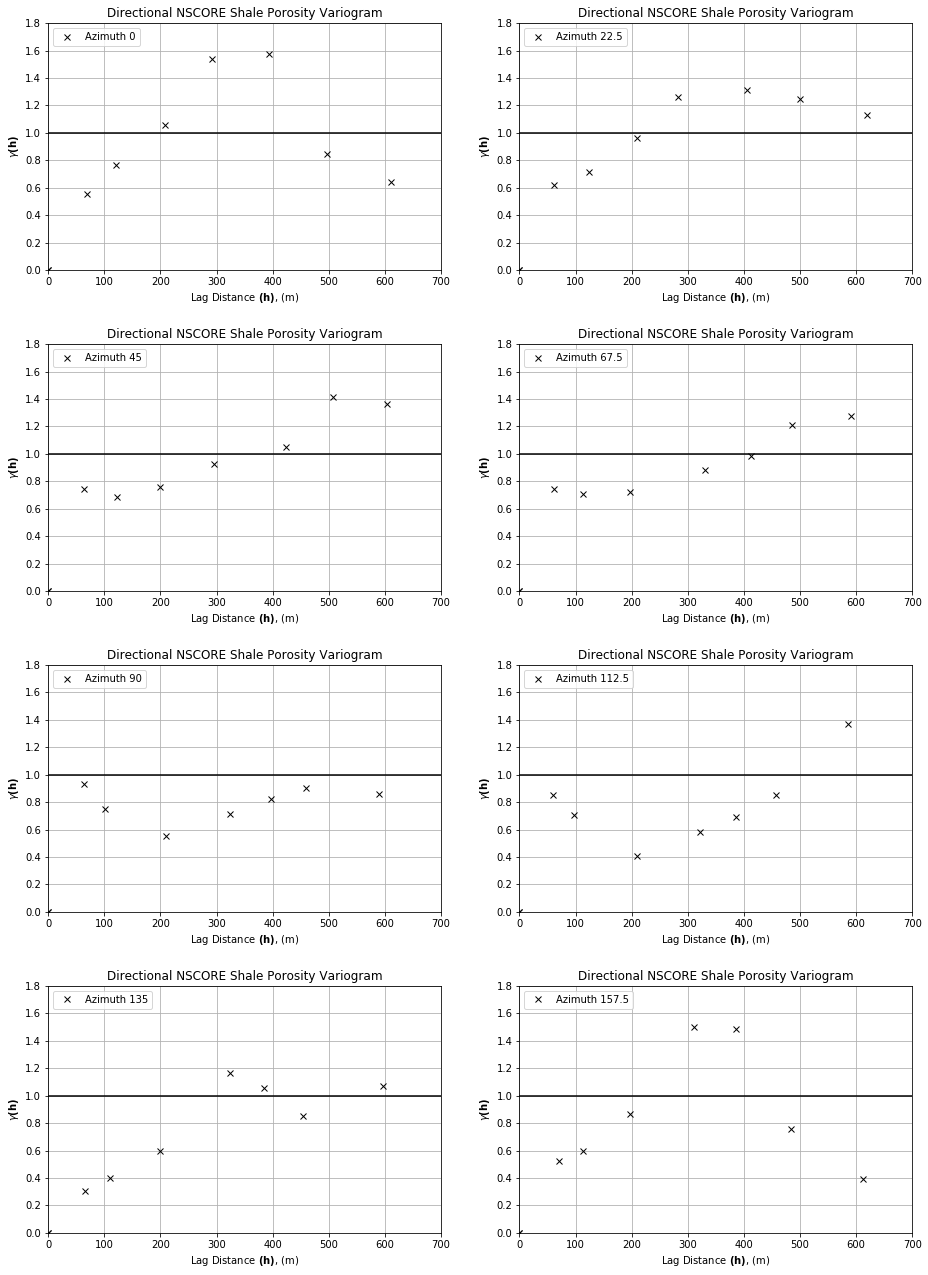

In [23]:
# Arrays to store the results
lag_shale_por = np.zeros((len(azi_mat),nlag+2)); gamma_shale_por = np.zeros((len(azi_mat),nlag+2)); npp_shale_por = np.zeros((len(azi_mat),nlag+2));

for iazi in range(0,len(azi_mat)):                      # Loop over all directions
    lag_shale_por[iazi,:], gamma_shale_por[iazi,:], npp_shale_por[iazi,:] = geostats.gamv(df_shale,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[iazi],atol,bandh,isill)
    plt.subplot(4,2,iazi+1)
    plt.plot(lag_shale_por[iazi,:],gamma_shale_por[iazi,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[iazi]))
    plt.plot([0,2000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Directional NSCORE Shale Porosity Variogram')
    plt.xlim([0,700])
    plt.ylim([0,1.8])
    plt.legend(loc='upper left')
    plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.2, wspace=0.2, hspace=0.3)
plt.show()

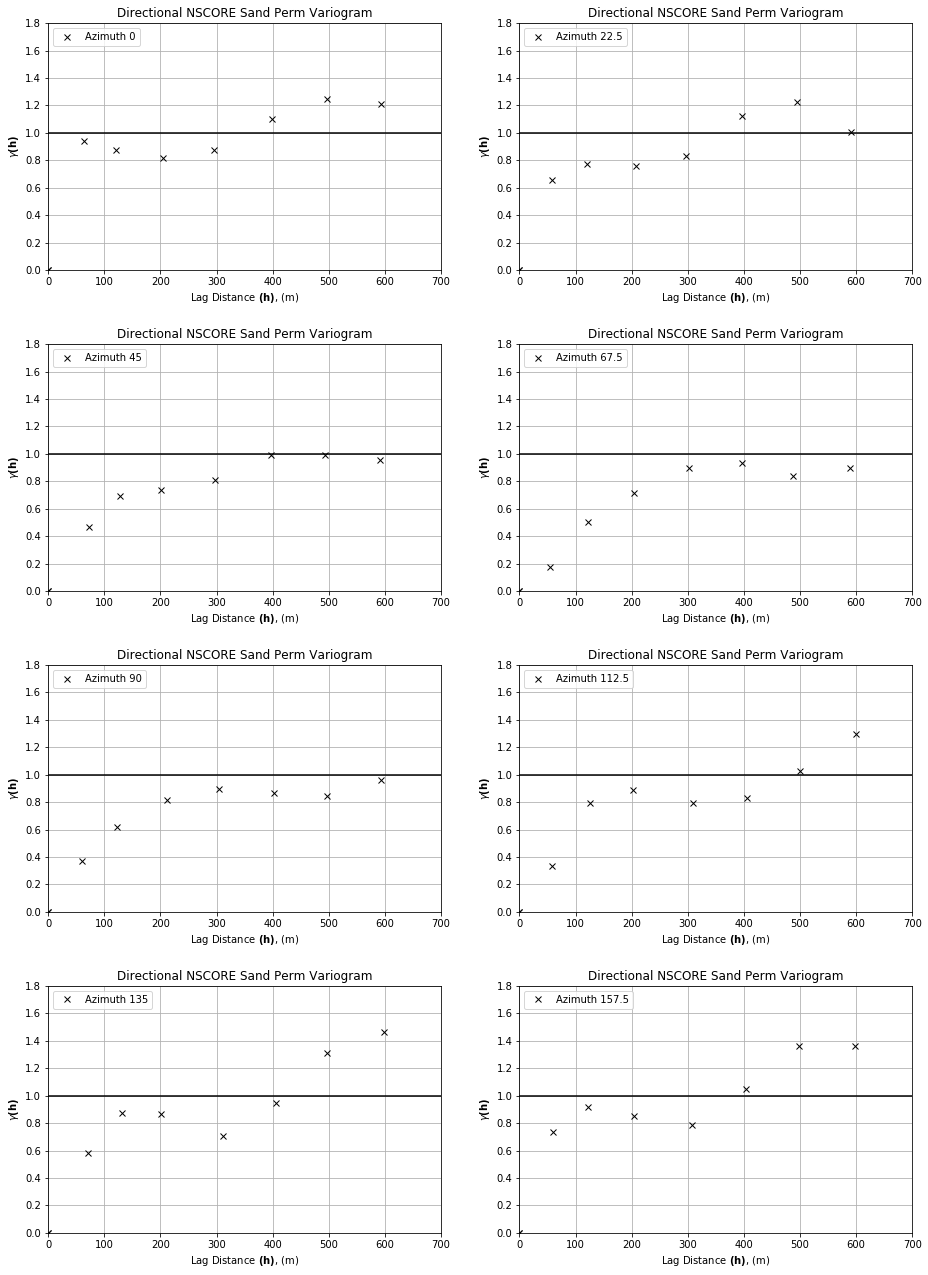

In [24]:
# Arrays to store the results
lag_sand_perm = np.zeros((len(azi_mat),nlag+2)); gamma_sand_perm = np.zeros((len(azi_mat),nlag+2)); npp_sand_perm = np.zeros((len(azi_mat),nlag+2));

for iazi in range(0,len(azi_mat)):                      # Loop over all directions
    lag_sand_perm[iazi,:], gamma_sand_perm[iazi,:], npp_sand_perm[iazi,:] = geostats.gamv(df_sand,"X","Y","NPerm",tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[iazi],atol,bandh,isill)
    plt.subplot(4,2,iazi+1)
    plt.plot(lag_sand_perm[iazi,:],gamma_sand_perm[iazi,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[iazi]))
    plt.plot([0,2000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Directional NSCORE Sand Perm Variogram')
    plt.xlim([0,700])
    plt.ylim([0,1.8])
    plt.legend(loc='upper left')
    plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.2, wspace=0.2, hspace=0.3)
plt.show()

Sand permeability variogram show major direction at 67.5 degree with range around 600 m. Minor direction at 157.5 with range around 200 m. 

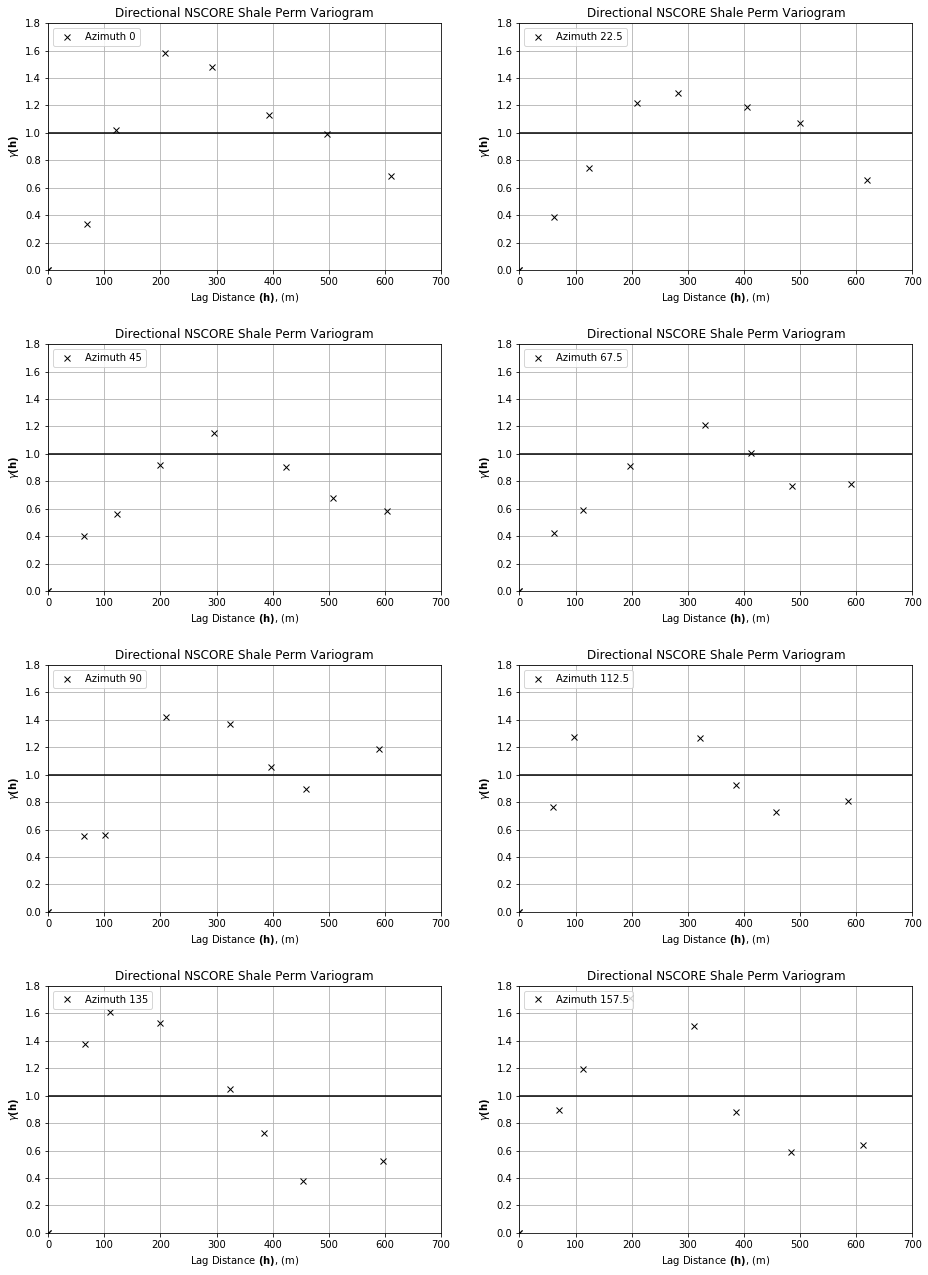

In [25]:
# Arrays to store the results
lag_shale_perm = np.zeros((len(azi_mat),nlag+2)); gamma_shale_perm = np.zeros((len(azi_mat),nlag+2)); npp_shale_perm = np.zeros((len(azi_mat),nlag+2));

for iazi in range(0,len(azi_mat)):                      # Loop over all directions
    lag_shale_perm[iazi,:], gamma_shale_perm[iazi,:], npp_shale_perm[iazi,:] = geostats.gamv(df_shale,"X","Y","NPerm",tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[iazi],atol,bandh,isill)
    plt.subplot(4,2,iazi+1)
    plt.plot(lag_shale_perm[iazi,:],gamma_shale_perm[iazi,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[iazi]))
    plt.plot([0,2000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Directional NSCORE Shale Perm Variogram')
    plt.xlim([0,700])
    plt.ylim([0,1.8])
    plt.legend(loc='upper left')
    plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.2, wspace=0.2, hspace=0.3)
plt.show()

Shale porosity and permeability variograms look very noisy (possibley due to too few data points). Therefore the shale porosity and permeability are not modelled in the subsequent section.

# 4. Variogram Modeling
The variograms parameters are tuned so the nested variogram matches the experimental variogram

### Facies

 x,y,z offsets = 9.238795319961289,3.826834336087908
 x,y,z offsets = 3.82683435267059,-9.238795313092517


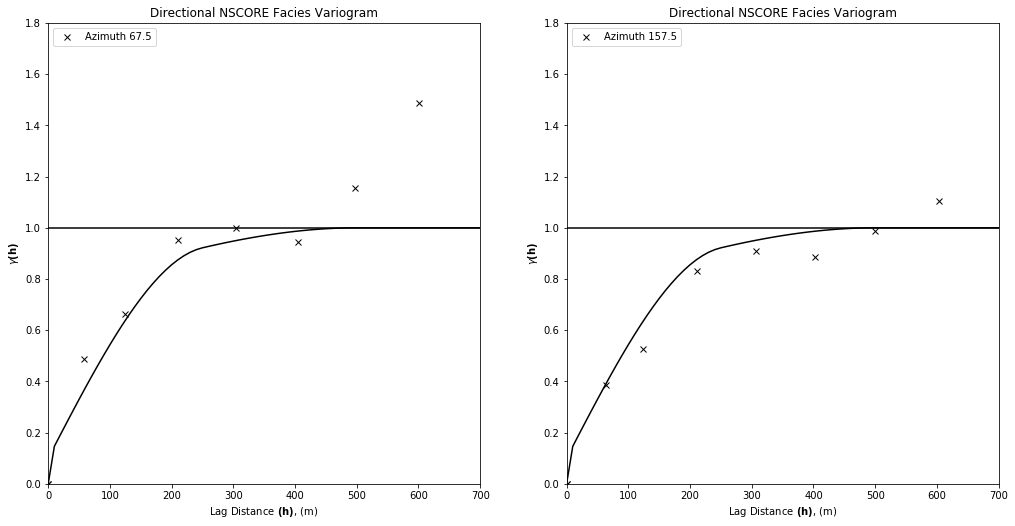

In [26]:
nug = 0.1; nst = 2
it1 = 1; cc1 = 0.65; azi1 = 157.5; hmaj1 = 250; hmin1 = 250
it2 = 1; cc2 = 0.25; azi2 = 157.5; hmaj2 = 500; hmin2 = 500

vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1,it2,cc2,azi2,hmaj2,hmin2)
nlag = 70; xlag = 10; azm = 67.5; 
index67,h67,gam67,cov67,ro67 = geostats.vmodel(nlag,xlag,azm,vario)
azm = 157.5
index157,h157,gam157,cov157,ro157 = geostats.vmodel(nlag,xlag,azm,vario)

plt.subplot(1,2,1)
plt.plot(lag_sand[3,:],gamma_sand[3,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[3]))
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.plot(h67,gam67,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Facies Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(lag_sand[7,:],gamma_sand[7,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[7]))
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.plot(h157,gam157,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Facies Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.6, wspace=0.2, hspace=0.3)
plt.show()

### Porosity

 x,y,z offsets = 9.238795333698832,-3.8268343029225473
 x,y,z offsets = 3.8268343195052275,9.238795326830061


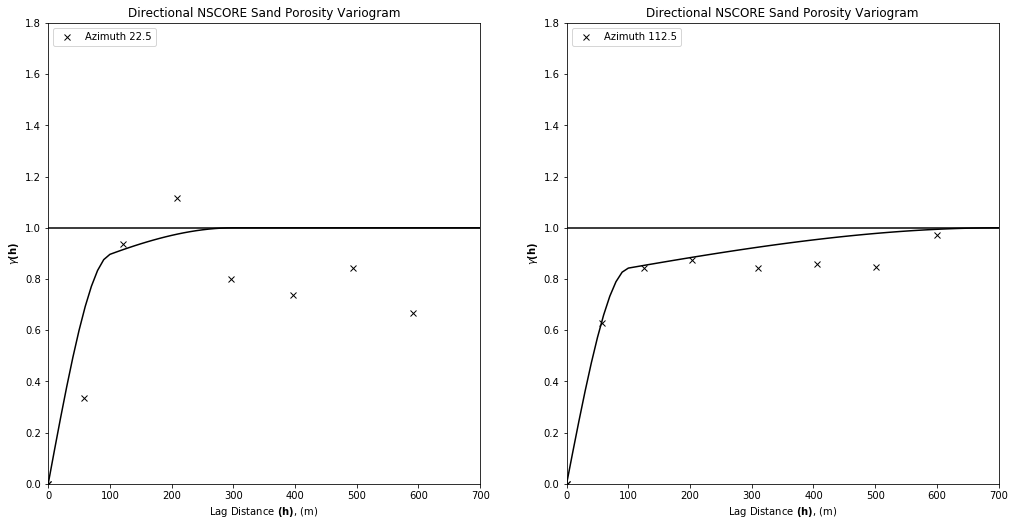

In [27]:
nug = 0.0; nst = 2
it1 = 1; cc1 = 0.2; azi1 = 112.5; hmaj1 = 700; hmin1 = 300
it2 = 1; cc2 = 0.8; azi2 = 112.5; hmaj2 = 100; hmin2 = 100

vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1,it2,cc2,azi2,hmaj2,hmin2)
nlag = 70; xlag = 10; azm = 112.5; 
index112,h112,gam112,cov112,ro112 = geostats.vmodel(nlag,xlag,azm,vario)
azm = 22.5
index22,h22,gam22,cov22,ro22 = geostats.vmodel(nlag,xlag,azm,vario)

plt.subplot(1,2,1)
plt.plot(lag_sand_por[1,:],gamma_sand_por[1,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[1]))
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.plot(h22,gam22,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Sand Porosity Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(lag_sand_por[5,:],gamma_sand_por[5,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[5]))
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.plot(h112,gam112,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Sand Porosity Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.6, wspace=0.2, hspace=0.3)
plt.show()

### Sand Permeability

 x,y,z offsets = 9.238795319961289,3.826834336087908
 x,y,z offsets = 3.82683435267059,-9.238795313092517


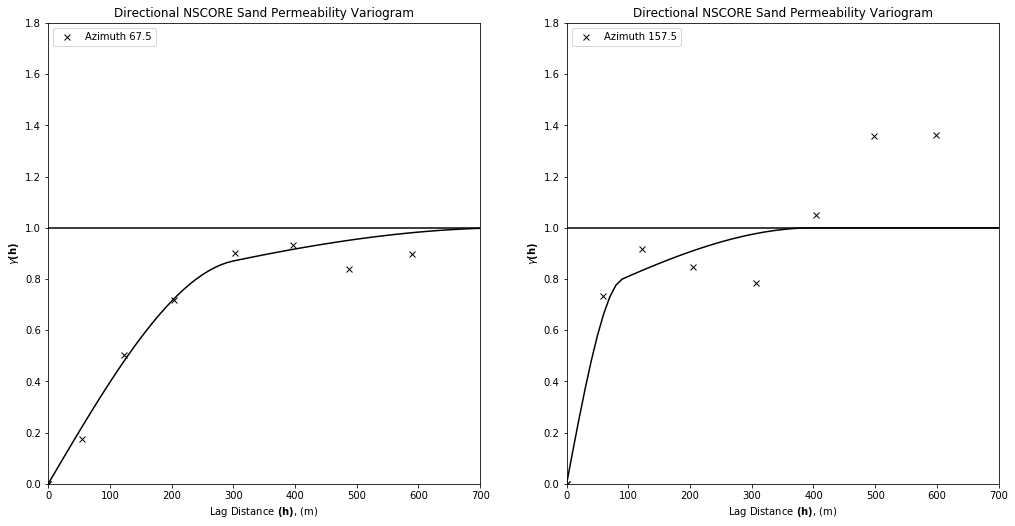

In [28]:
nug = 0.0; nst = 2
it1 = 1; cc1 = 0.7; azi1 = 67.5; hmaj1 = 300; hmin1 = 90
it2 = 1; cc2 = 0.3; azi2 = 67.5; hmaj2 = 750; hmin2 = 400

vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1,it2,cc2,azi2,hmaj2,hmin2)
nlag = 70; xlag = 10; azm = 67.5; 
index67,h67,gam67,cov67,ro67 = geostats.vmodel(nlag,xlag,azm,vario)
azm = 157.5
index157,h157,gam157,cov157,ro157 = geostats.vmodel(nlag,xlag,azm,vario)

plt.subplot(1,2,1)
plt.plot(lag_sand_perm[3,:],gamma_sand_perm[3,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[3]))
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.plot(h67,gam67,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Sand Permeability Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(lag_sand_perm[7,:],gamma_sand_perm[7,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[7]))
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.plot(h157,gam157,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Sand Permeability Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.6, wspace=0.2, hspace=0.3)
plt.show()